# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [191]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [192]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report

from IPython.display import display

### **1.1 Load the Data**

In [193]:
# Load the dataset
df_emp = pd.read_csv("../data/raw/employee_data.csv", header=0)


In [194]:
# Check the first few entries
df_emp.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27.0,High School,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [195]:
# Inspect the shape of the dataset
df_emp.shape

(74610, 24)

In [196]:
# Inspect the different columns in the dataset
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [197]:
# Check the summary of the dataset
df_emp.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74610.0,37246.028696,21505.785344,1.0,18624.25,37239.5,55871.75,74498.0
Age,74610.0,38.529379,12.082299,18.0,28.00,39.0,49.00,59.0
Years at Company,74610.0,15.722638,11.224059,1.0,7.00,13.0,23.00,51.0
Monthly Income,74610.0,7344.931417,2596.373589,1226.0,5652.00,7348.5,8876.00,50030.0
Number of Promotions,74610.0,0.832958,0.995326,0.0,0.00,1.0,2.00,4.0
Distance from Home,72698.0,49.990839,28.519135,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74610.0,1.657432,1.579862,0.0,0.00,1.0,3.00,15.0
Company Tenure (In Months),72197.0,55.711899,25.392325,2.0,36.00,56.0,76.00,128.0


### **1.3 Check the data type of columns**

In [198]:
# Check the info to see the types of the feature variables and the null values present
df_emp.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [199]:
# Check the number of missing values in each column
# Distance from Home 1912
# Company Tenure (In Months)    2413
df_emp[['Distance from Home','Company Tenure (In Months)']].isnull().sum()

Distance from Home            1912
Company Tenure (In Months)    2413
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [200]:
# Check the percentage of missing values in each column
df_emp[['Distance from Home','Company Tenure (In Months)']].isnull().sum()/df_emp.shape[0]*100

Distance from Home            2.562659
Company Tenure (In Months)    3.234151
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [201]:
# Handle the missing value rows in the column
df_emp['Distance from Home'].fillna(df_emp['Distance from Home'].median(), inplace=True)
df_emp['Company Tenure (In Months)'].fillna(df_emp['Company Tenure (In Months)'].mode()[0], inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [202]:
# Check the percentage of remaining data after missing values are removed
df_emp[['Distance from Home','Company Tenure (In Months)']].isnull().sum()/df_emp.shape[0]*100

Distance from Home            0.0
Company Tenure (In Months)    0.0
dtype: float64

In [203]:
df_emp.shape

(74610, 24)

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [204]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_cat_cols(dataframe):
    cat_cols = dataframe.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(f"Unique Values: {dataframe[col].value_counts()}")
# Check the categorical columns
check_cat_cols(df_emp)


Column: Gender
Unique Values: Gender
Male      40898
Female    33712
Name: count, dtype: int64

Column: Job Role
Unique Values: Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64

Column: Work-Life Balance
Unique Values: Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64

Column: Job Satisfaction
Unique Values: Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64

Column: Performance Rating
Unique Values: Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64

Column: Overtime
Unique Values: Overtime
No     50230
Yes    24380
Name: count, dtype: int64

Column: Education Level
Unique Values: Education Level
Bachelorâ€™s Degree    22365
Associate Degree       18678
Masterâ€™s Degree      150

In [205]:
# Check the data

# Column: Education Level
# Unique Values: Education Level
# Bachelorâ€™s Degree    22365
# Associate Degree       18678
# Masterâ€™s Degree      15044
# High School            14701
# PhD                     3822

df_emp['Education Level'].replace({"Bachelorâ€™s Degree": "Bachelors Degree", "Masterâ€™s Degree": "Masters Degree"}, inplace=True)
df_emp['Education Level'].value_counts()

Education Level
Bachelors Degree    22365
Associate Degree    18678
Masters Degree      15044
High School         14701
PhD                  3822
Name: count, dtype: int64


Column: Employee ID
Min: 1
Max: 74498
Mean: 37246.02869588527
Median: 37239.5
Standard Deviation: 21505.785344423082


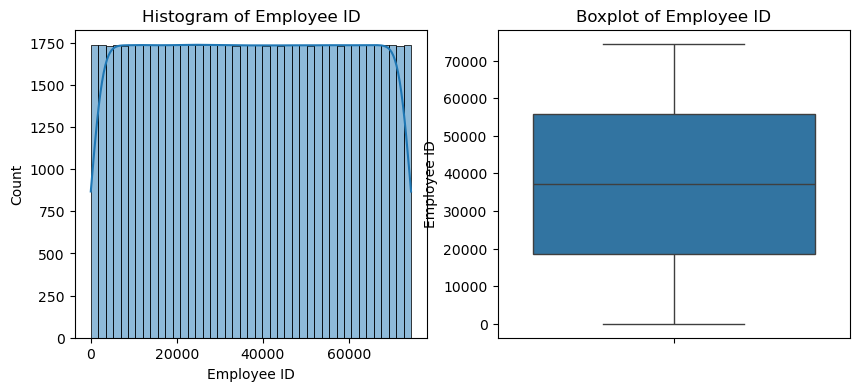


Column: Age
Min: 18
Max: 59
Mean: 38.529379439753384
Median: 39.0
Standard Deviation: 12.08229947588478


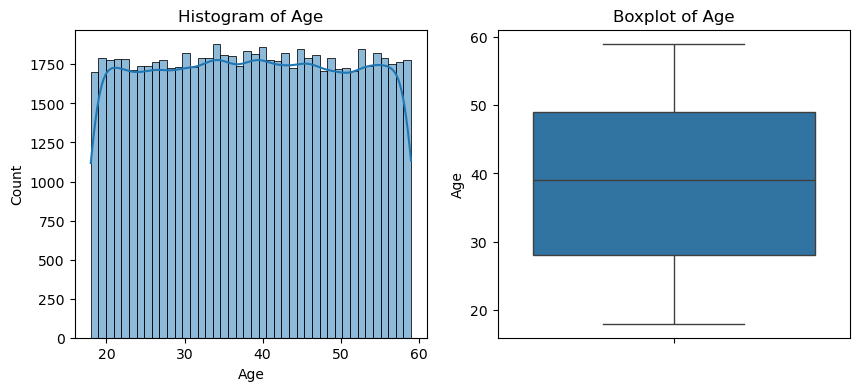


Column: Years at Company
Min: 1
Max: 51
Mean: 15.722637716123844
Median: 13.0
Standard Deviation: 11.224058830972064


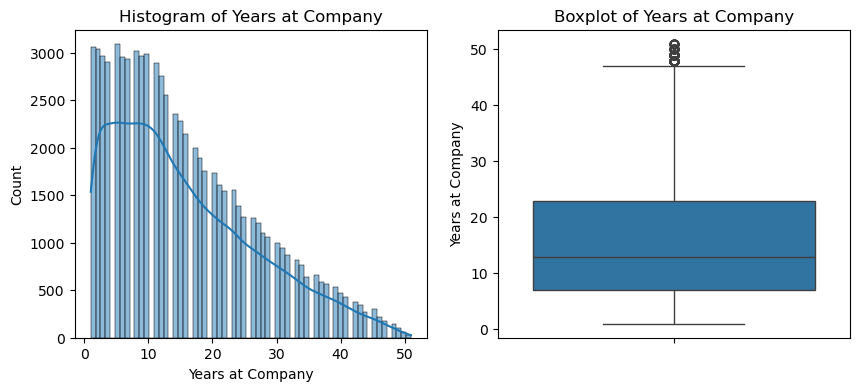


Column: Monthly Income
Min: 1226
Max: 50030
Mean: 7344.931416700174
Median: 7348.5
Standard Deviation: 2596.3735885842902


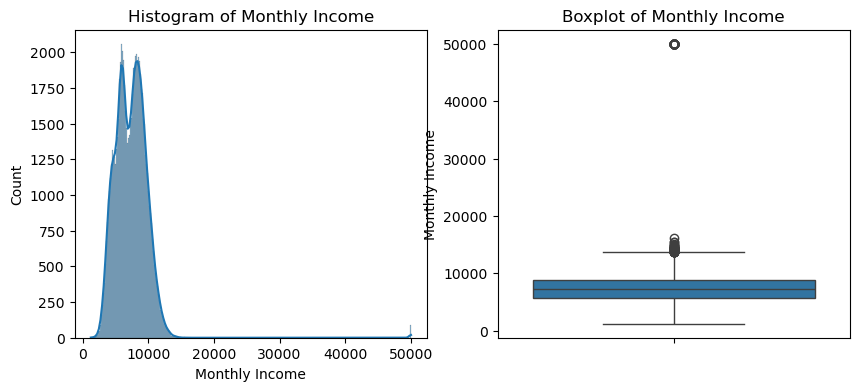


Column: Number of Promotions
Unique Values: Number of Promotions
0    37201
1    18709
2    13652
3     4058
4      990
Name: count, dtype: int64

Column: Distance from Home
Min: 1.0
Max: 99.0
Mean: 49.991073582629674
Median: 50.0
Standard Deviation: 28.15133451669595


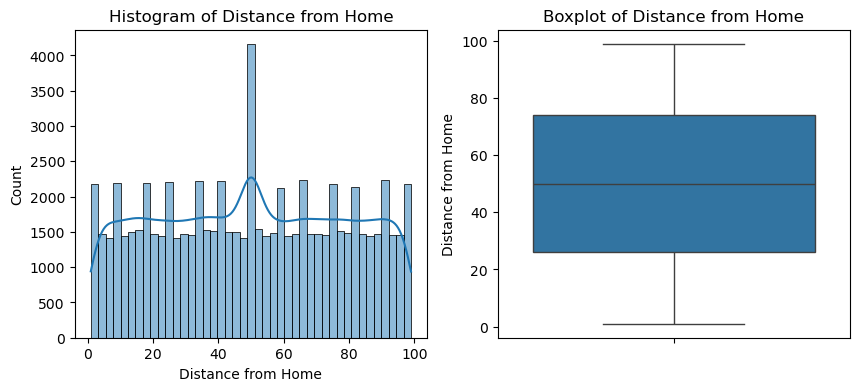


Column: Number of Dependents
Unique Values: Number of Dependents
0     22281
1     19341
2     11129
3     10382
4      7635
5      3003
6       791
15       27
10       21
Name: count, dtype: int64

Column: Company Tenure (In Months)
Min: 2.0
Max: 128.0
Mean: 55.300777375686906
Median: 54.0
Standard Deviation: 25.079358892313536


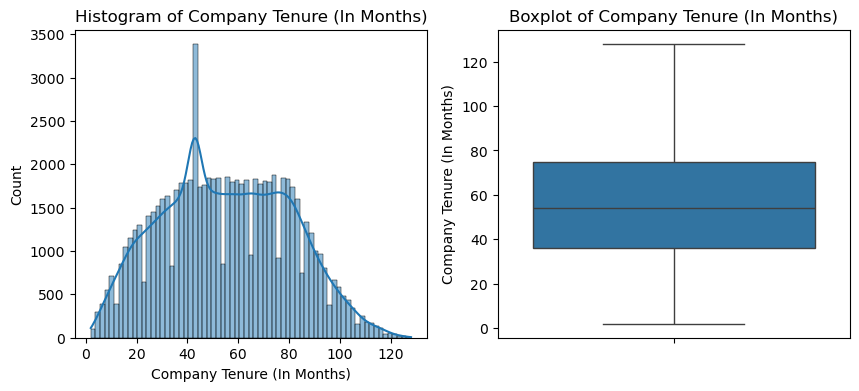

In [206]:
# Check values in numerical columns
def check_num_cols(dataframe):

    for col in dataframe.select_dtypes(include='number').columns:
        print(f"\nColumn: {col}")
        if df_emp[col].astype('category').value_counts().shape[0] < 20:
            print(f"Unique Values: {dataframe[col].value_counts()}")
        else:
            print(f"Min: {dataframe[col].min()}")
            print(f"Max: {dataframe[col].max()}")
            print(f"Mean: {dataframe[col].mean()}")
            print(f"Median: {dataframe[col].median()}")
            print(f"Standard Deviation: {dataframe[col].std()}")
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            sns.histplot(dataframe[col], kde=True)
            plt.title(f'Histogram of {col}')
            plt.subplot(1,2,2)
            sns.boxplot(y=dataframe[col])
            plt.title(f'Boxplot of {col}')
            plt.show()
# Check the categorical columns
check_num_cols(df_emp)

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [207]:
# Drop redundant columns which are not required for modelling
df_emp.drop(columns=['Employee ID'], inplace=True)

In [208]:
df_emp.shape

(74610, 23)

In [209]:
# Check first few rows of data
df_emp.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masters Degree,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11.0,Bachelors Degree,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,27.0,High School,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [210]:
# Import Train Test Split



### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [267]:
# Put all the feature variables in X

# Put the target variable in y

X = df_emp.drop(columns=['Attrition'])
y = df_emp['Attrition']

In [268]:
print (X.shape, y.shape)

(74610, 22) (74610,)


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [269]:
# Split the data into 70% train data and 30% validation data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(52227, 22) (22383, 22) (52227,) (22383,)
Attrition
Stayed    0.525284
Left      0.474716
Name: proportion, dtype: float64
Attrition
Stayed    0.525265
Left      0.474735
Name: proportion, dtype: float64


In [270]:
X_train.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure (In Months)',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [271]:
# Select numerical columns
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

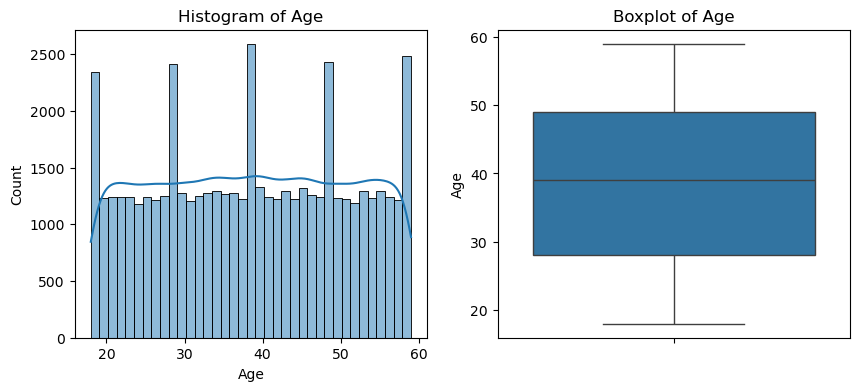

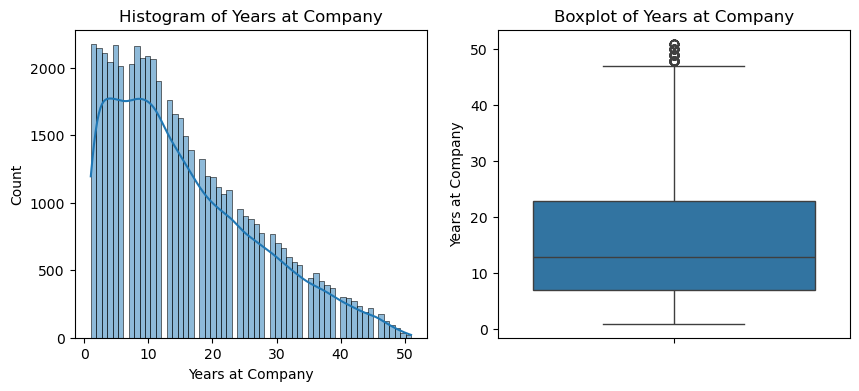

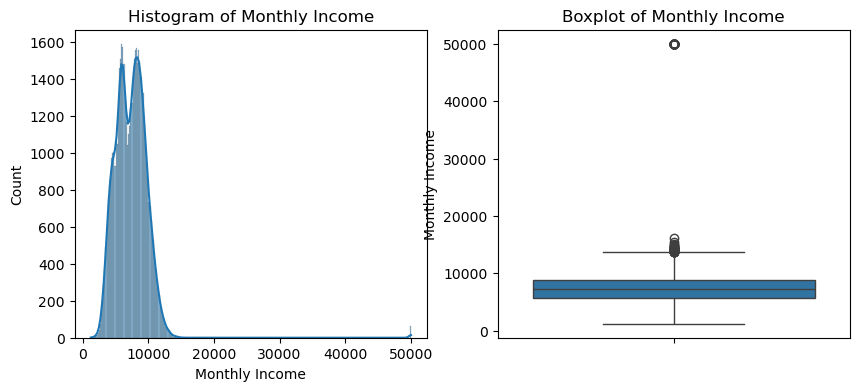

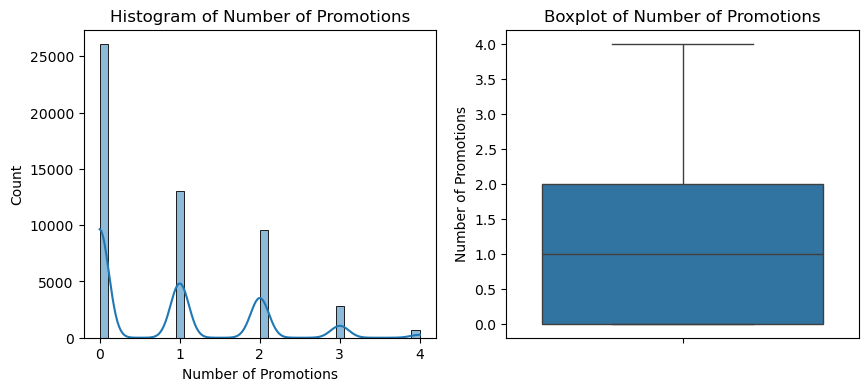

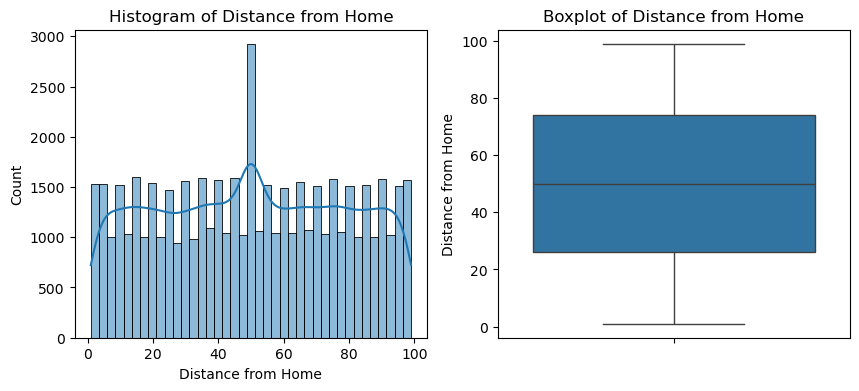

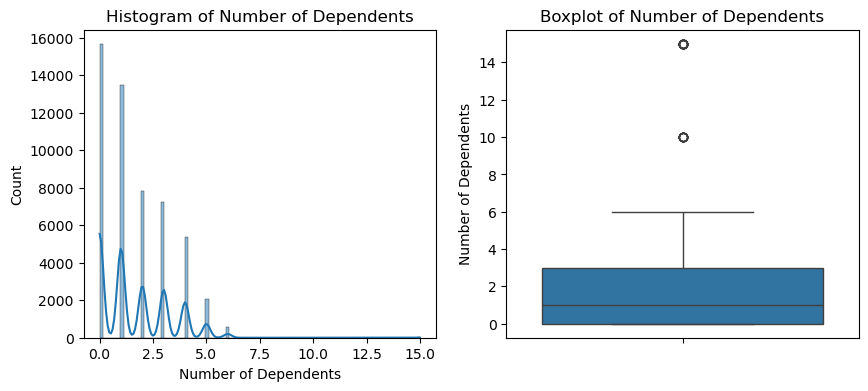

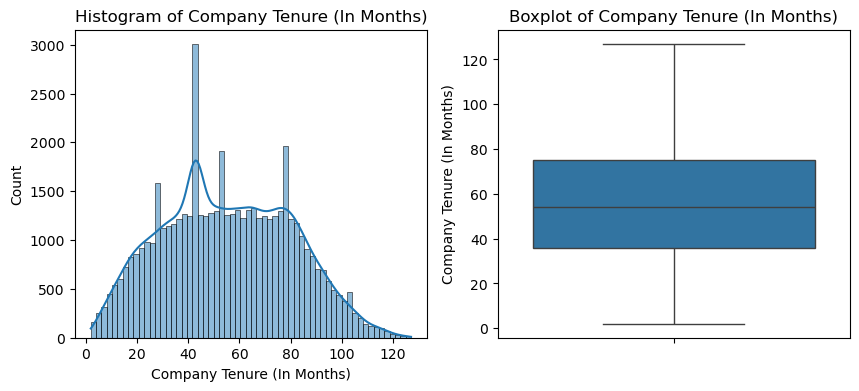

In [272]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries

def plot_num_cols(dataframe, num_columns):
    for col in num_columns:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.histplot(dataframe[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.subplot(1,2,2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Plot the numerical columns
plot_num_cols(X_train, num_cols)


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

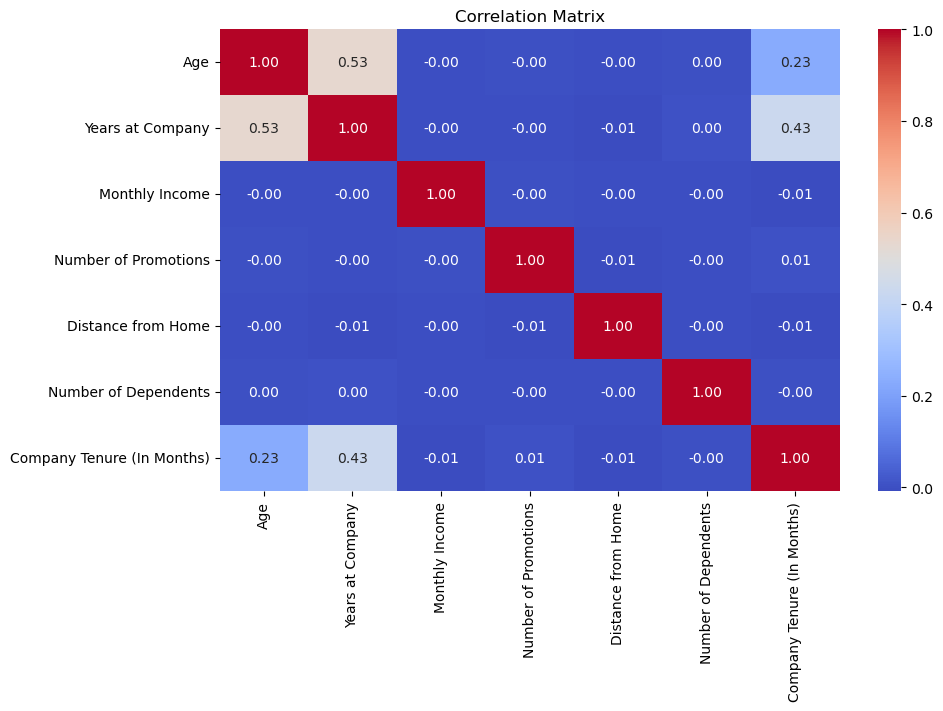

In [273]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix

corr = X_train[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [274]:
# Plot a bar chart to check class balance
print (y_train.value_counts(normalize=True))

print (y_test.value_counts(normalize=True))

Attrition
Stayed    0.525284
Left      0.474716
Name: proportion, dtype: float64
Attrition
Stayed    0.525265
Left      0.474735
Name: proportion, dtype: float64


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

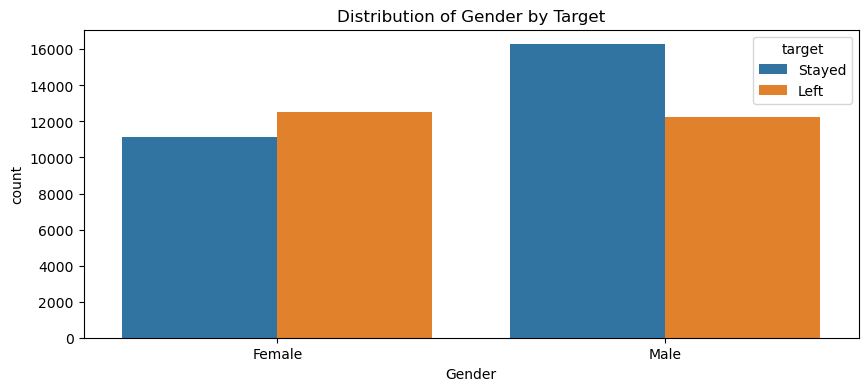

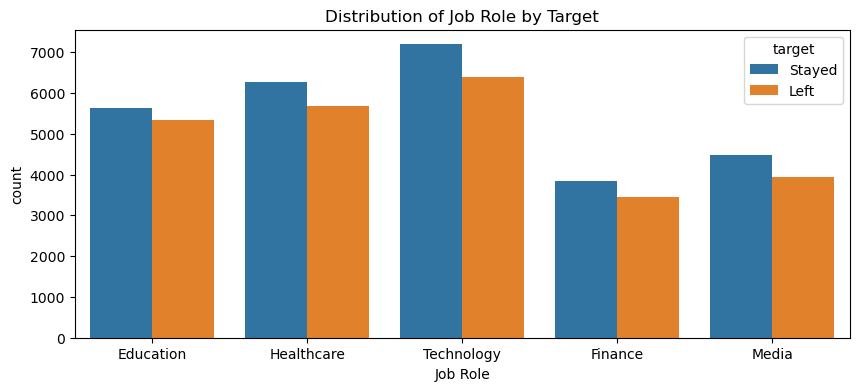

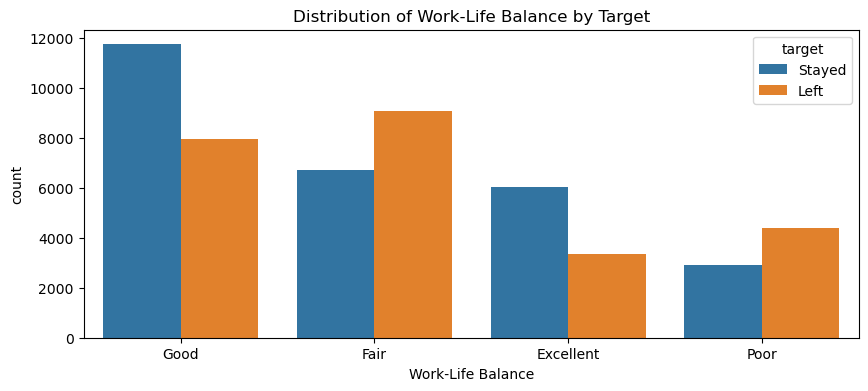

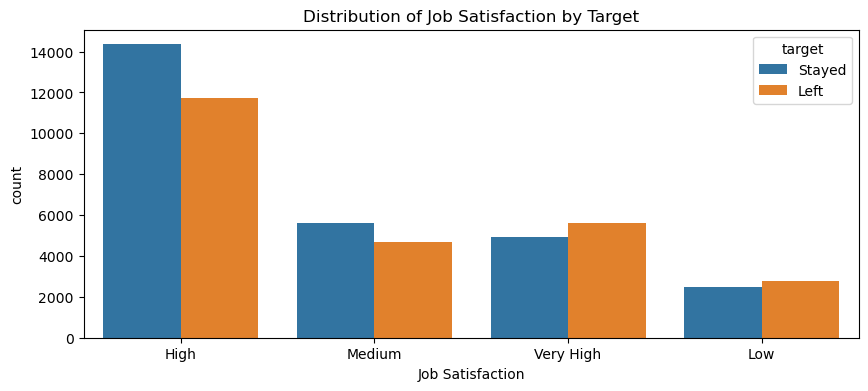

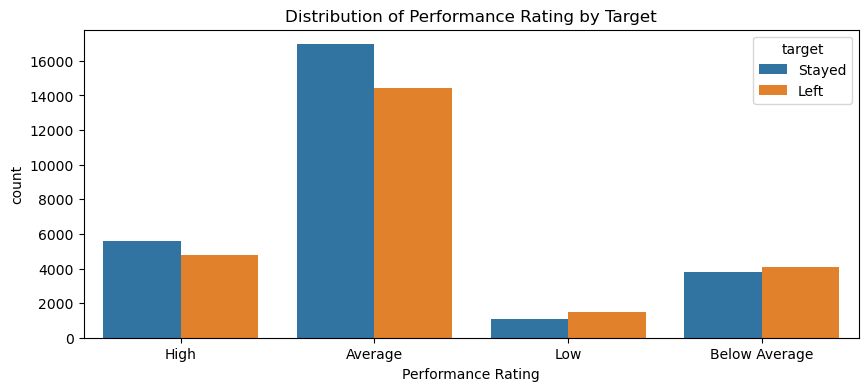

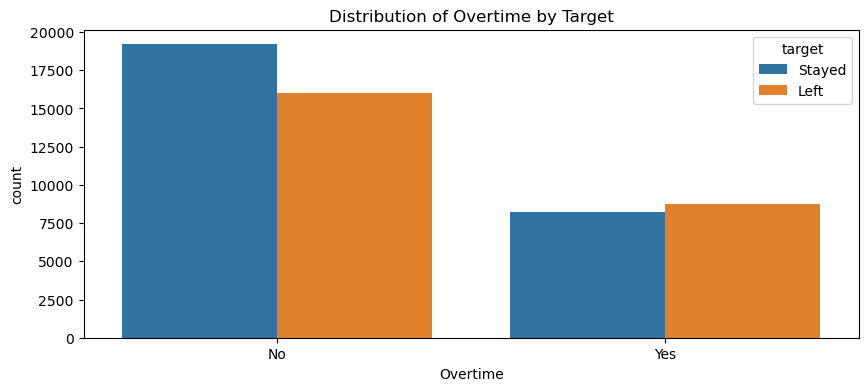

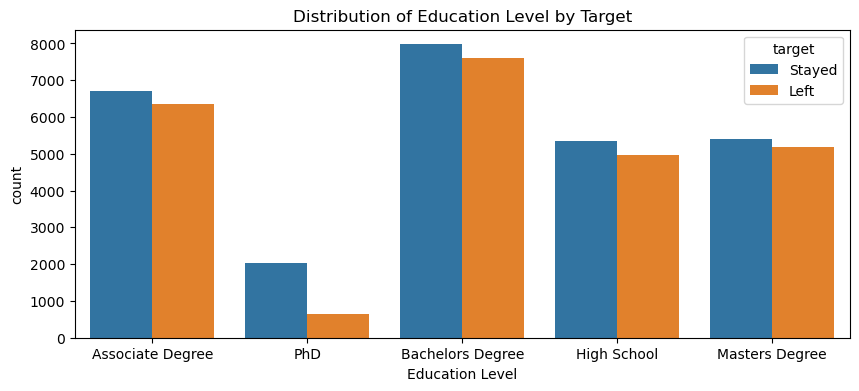

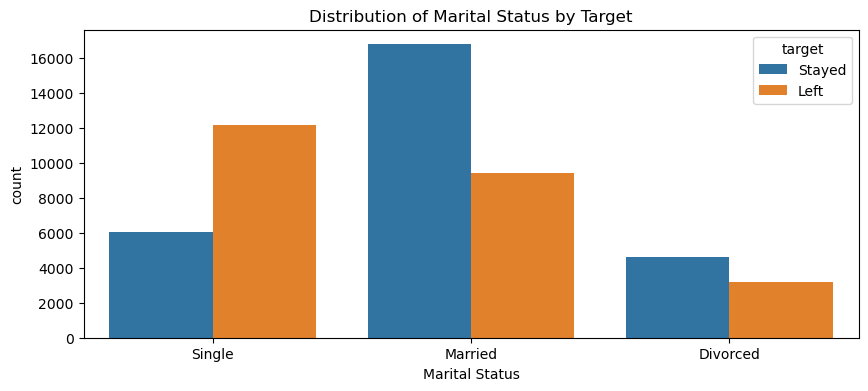

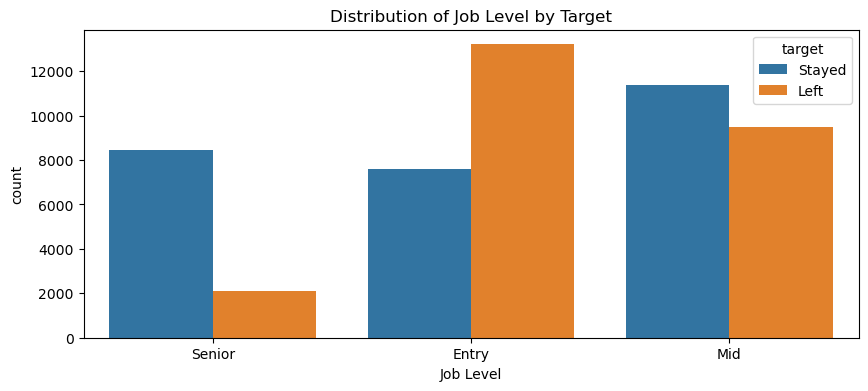

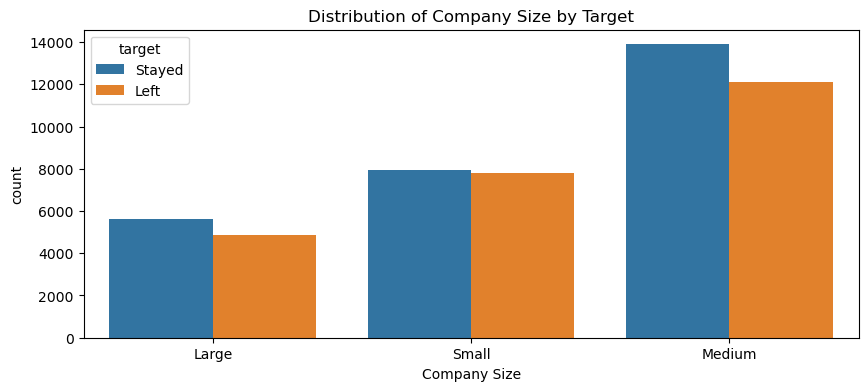

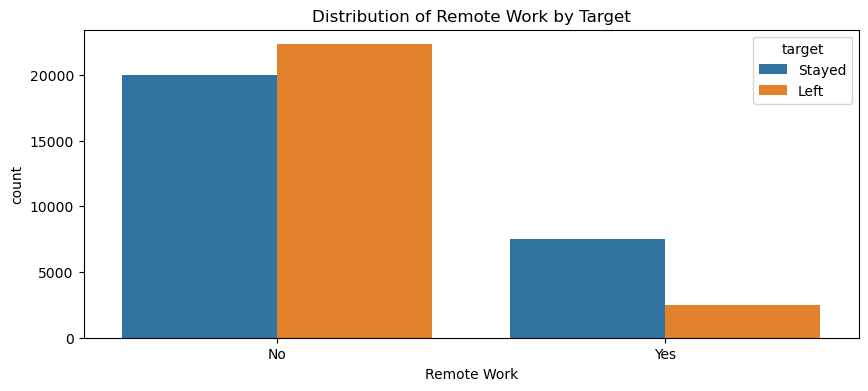

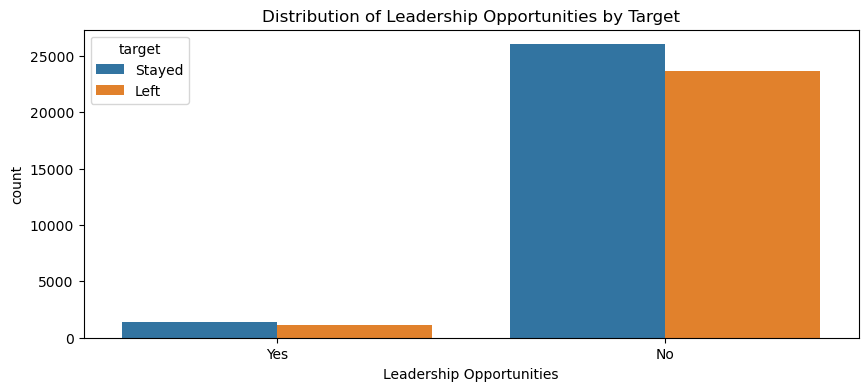

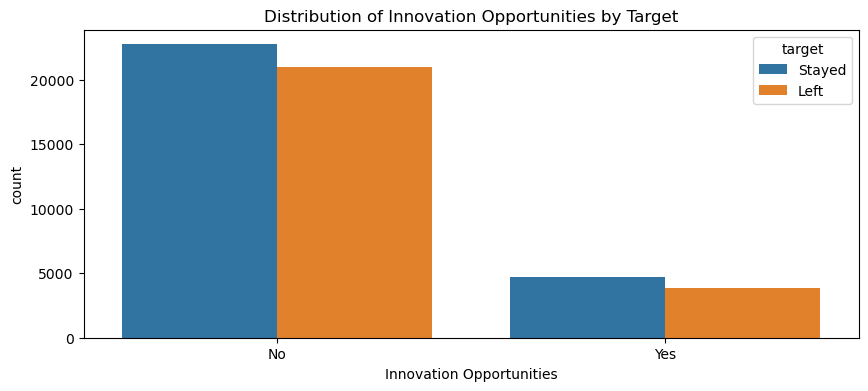

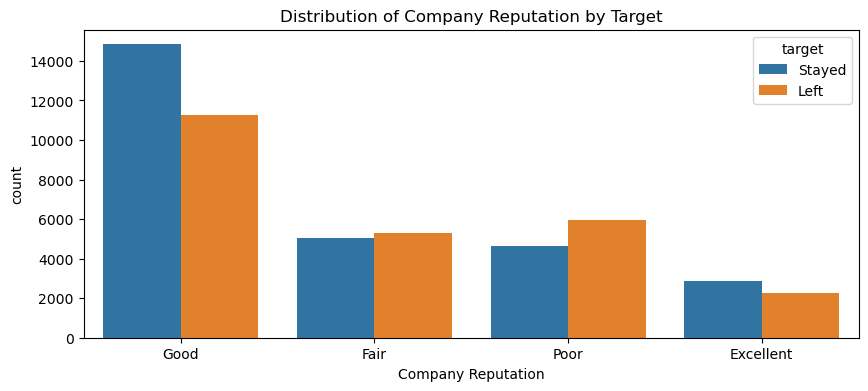

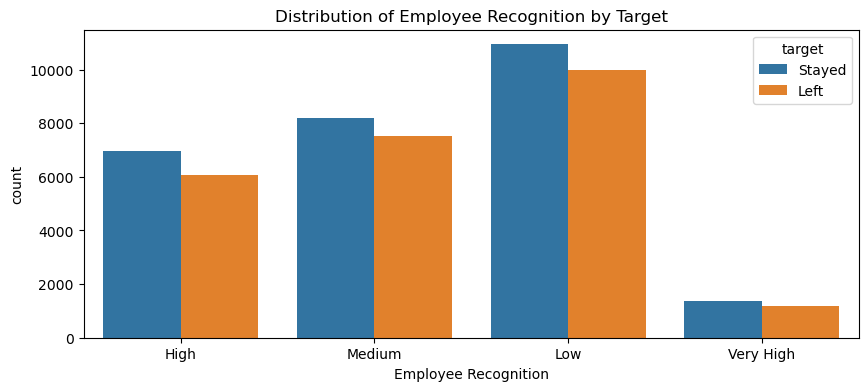

In [275]:
# Plot distribution for each categorical column with target variable


def plot_cat_target_cols(dataframe, cat_columns):
    for col in cat_columns:
        plt.figure(figsize=(10,4))
        sns.countplot(x=col, hue='target', data=dataframe)
        plt.title(f'Distribution of {col} by Target')
        plt.show()

plot_cat_target_cols(pd.concat([X_train, y_train.rename('target')], axis=1), cat_cols)

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [276]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [277]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [278]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [279]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [280]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [281]:
# Check the categorical columns
X_train.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure (In Months)',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

In [282]:
X_copy = X_train.copy()
y_copy = y_train.copy()

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [283]:
# Create dummy variables using the 'get_dummies' for independent columns

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)



In [284]:
X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelors Degree', 'Education Level_High School',
       'Education Level_Masters Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Repu

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [285]:
# Create dummy variables using the 'get_dummies' for independent columns

X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)


Now, drop the original categorical columns and check the DataFrame

In [286]:
X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelors Degree', 'Education Level_High School',
       'Education Level_Masters Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Repu

In [287]:
X_test.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelors Degree', 'Education Level_High School',
       'Education Level_Masters Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Repu

In [288]:
# Convert the Boolean categorical columns to numerical using map function
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].applymap({True: 1, False: 0}.get)
X_test[bool_cols] = X_test[bool_cols].applymap({True: 1, False: 0}.get)

In [289]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52227, 41) (22383, 41) (52227,) (22383,)


In [290]:
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelors Degree,Education Level_High School,Education Level_Masters Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
20940,25,1,4207,2,6.0,5,78.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
17495,26,13,9601,0,14.0,0,83.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
28404,35,19,5415,0,10.0,3,48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
70914,21,9,8258,0,50.0,5,16.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
56430,53,24,6015,1,13.0,0,79.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [291]:
# Convert y_train and y_validation to DataFrame to create dummy variables

# Using get dummies does not ensure that the class of interest ("Left") is mapped to 1
# y_train = pd.get_dummies(y_train, drop_first=True)
# y_train = y_train.rename(columns={'Stayed': 'Attrition'})
# y_train = y_train.astype(int)
# y_train.head()

y_train = y_train.replace({"Stayed": 0, "Left": 1})
y_train = y_train.rename("Attrition")
y_train = y_train.astype(int)
y_train.head()

20940    0
17495    1
28404    1
70914    0
56430    0
Name: Attrition, dtype: int64

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [292]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = y_train.replace({"Stayed": 0, "Left": 1})
y_train = y_train.rename("Attrition")
y_train = y_train.astype(int)
y_train.head()

20940    0
17495    1
28404    1
70914    0
56430    0
Name: Attrition, dtype: int64

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [293]:
# Create dummy variables using the 'get_dummies' for dependent column


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [294]:
# Drop redundant columns from both train and validation


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [295]:
# Import the necessary scaling tool from scikit-learn
## This is another way to use scaling
# from sklearn import preprocessing

# preprocessing using Standard Scaler by default
# X_train_temp = X_train.copy()
# X_train_scaled = preprocessing.scale(X_train_temp)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# X_test_temp = X_test.copy()
# X_test_scaled = preprocessing.scale(X_test_temp)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [296]:

X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelors Degree', 'Education Level_High School',
       'Education Level_Masters Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Repu

In [297]:
# Standard Scaler
# fit(X_train) → computes mean and std for each feature in X_train.
# transform(X_train) → applies scaling: 𝑥′ = (𝑥 − 𝜇) / 𝜎

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelors Degree,Education Level_High School,Education Level_Masters Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,-1.127561,-1.308255,-1.204700,1.169352,-1.566205,2.116214,0.906611,-1.097543,-0.402967,-0.544816,-0.438848,-0.59263,-0.658742,1.284016,-0.404378,-0.334477,-0.495706,-0.503934,-0.42191,2.009552,-0.228427,-0.695349,-0.651996,-0.496245,-0.504352,-0.232252,-1.004087,1.366014,-0.815233,1.986860,-0.996388,-0.655546,-0.485222,4.390268,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,-0.656084,-0.226938
1,-1.044579,-0.240890,0.864966,-0.836255,-1.281911,-1.047331,1.105736,0.911126,-0.402967,1.835483,-0.438848,-0.59263,1.518045,-0.778807,-0.404378,-0.334477,2.017324,-0.503934,-0.42191,-0.497623,-0.228427,-0.695349,-0.651996,-0.496245,-0.504352,4.305661,0.995930,-0.732057,-0.815233,-0.503307,-0.996388,1.525446,-0.485222,4.390268,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,1.524196,-0.226938
2,-0.297739,0.292793,-0.741193,-0.836255,-1.424058,0.850796,-0.288142,-1.097543,-0.402967,-0.544816,-0.438848,-0.59263,-0.658742,-0.778807,-0.404378,-0.334477,-0.495706,-0.503934,-0.42191,-0.497623,-0.228427,1.438126,1.533753,-0.496245,-0.504352,-0.232252,-1.004087,1.366014,1.226643,-0.503307,-0.996388,-0.655546,-0.485222,-0.227777,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,1.524196,-0.226938
3,-1.459489,-0.596678,0.349660,-0.836255,-0.002589,2.116214,-1.562545,0.911126,-0.402967,1.835483,-0.438848,-0.59263,-0.658742,1.284016,-0.404378,-0.334477,-0.495706,-0.503934,-0.42191,-0.497623,-0.228427,-0.695349,1.533753,-0.496245,-0.504352,-0.232252,0.995930,-0.732057,1.226643,-0.503307,-0.996388,1.525446,-0.485222,-0.227777,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,-0.656084,-0.226938
4,1.195939,0.737529,-0.510974,0.166548,-1.317448,-1.047331,0.946436,0.911126,-0.402967,-0.544816,-0.438848,-0.59263,1.518045,-0.778807,-0.404378,-0.334477,2.017324,-0.503934,-0.42191,-0.497623,-0.228427,-0.695349,-0.651996,-0.496245,-0.504352,-0.232252,0.995930,-0.732057,-0.815233,-0.503307,-0.996388,1.525446,-0.485222,4.390268,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,-0.656084,-0.226938


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [298]:
# Scale the numeric features present in the training set

# Scale the numerical features present in the validation set

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelors Degree,Education Level_High School,Education Level_Masters Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,0.532082,-0.596678,1.192260,-0.836255,-0.891007,0.218087,1.265037,0.911126,2.481593,-0.544816,-0.438848,-0.59263,-0.658742,1.284016,-0.404378,-0.334477,-0.495706,-0.503934,-0.421910,2.009552,-0.228427,-0.695349,-0.651996,2.015132,-0.504352,-0.232252,-1.004087,-0.732057,-0.815233,-0.503307,-0.996388,1.525446,-0.485222,-0.227777,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,-0.656084,-0.226938
1,0.449100,-0.507731,-1.410746,-0.836255,0.494925,-1.047331,1.344687,0.911126,-0.402967,-0.544816,-0.438848,-0.59263,-0.658742,1.284016,-0.404378,2.989738,-0.495706,-0.503934,-0.421910,-0.497623,-0.228427,-0.695349,-0.651996,-0.496245,1.982741,-0.232252,-1.004087,-0.732057,1.226643,-0.503307,1.003625,-0.655546,-0.485222,-0.227777,-0.442535,-0.496815,-0.999139,-0.505577,-0.818002,1.524196,-0.226938
2,-1.210543,-0.952467,-0.262338,-0.836255,-1.139764,-0.414622,0.388885,0.911126,-0.402967,-0.544816,2.278692,-0.59263,1.518045,-0.778807,-0.404378,-0.334477,-0.495706,1.984386,2.370172,-0.497623,-0.228427,-0.695349,-0.651996,-0.496245,-0.504352,-0.232252,0.995930,-0.732057,-0.815233,-0.503307,1.003625,-0.655546,-0.485222,-0.227777,2.259708,-0.496815,-0.999139,1.977940,-0.818002,1.524196,-0.226938
3,0.200154,-0.507731,-0.500614,-0.836255,1.205660,-1.047331,-0.128842,0.911126,-0.402967,-0.544816,-0.438848,-0.59263,1.518045,-0.778807,-0.404378,-0.334477,2.017324,-0.503934,-0.421910,-0.497623,-0.228427,-0.695349,-0.651996,2.015132,-0.504352,-0.232252,-1.004087,-0.732057,1.226643,-0.503307,-0.996388,1.525446,-0.485222,-0.227777,-0.442535,-0.496815,1.000862,-0.505577,-0.818002,1.524196,-0.226938
4,0.449100,0.025952,0.174310,0.166548,-1.530668,2.116214,-0.766043,0.911126,-0.402967,1.835483,-0.438848,-0.59263,-0.658742,1.284016,-0.404378,-0.334477,2.017324,-0.503934,-0.421910,-0.497623,-0.228427,1.438126,-0.651996,-0.496245,-0.504352,4.305661,-1.004087,-0.732057,-0.815233,-0.503307,-0.996388,1.525446,-0.485222,4.390268,-0.442535,-0.496815,-0.999139,1.977940,1.222491,-0.656084,-0.226938


In [299]:
X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelors Degree', 'Education Level_High School',
       'Education Level_Masters Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Repu

In [300]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52227, 41) (22383, 41) (52227,) (22383,)


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [301]:
# Import 'LogisticRegression' and create a LogisticRegression object
log_model = LogisticRegression(random_state=42)

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [302]:
# Import RFE and select 15 variables

# RFE will recursively eliminate features until only 15 remain.
# estimator = logistic regression
# n_features_to_select=15 → keeps exactly 15 features
# If you want to automatically find the best number of features, you’d use RFECV instead (cross-validation based).

from sklearn.feature_selection import RFE, RFECV
rfe = RFE(estimator= log_model, n_features_to_select=15)
rfe.fit(X_train, y_train)

,estimator,LogisticRegre...ndom_state=42)
,n_features_to_select,15
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [303]:
# Display the features selected by RFE
# support_ → True if selected, False otherwise
# ranking_ → 1 = selected, >1 = ranking order of elimination

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', np.False_, np.int64(9)),
 ('Years at Company', np.True_, np.int64(1)),
 ('Monthly Income', np.False_, np.int64(26)),
 ('Number of Promotions', np.True_, np.int64(1)),
 ('Distance from Home', np.True_, np.int64(1)),
 ('Number of Dependents', np.True_, np.int64(1)),
 ('Company Tenure (In Months)', np.False_, np.int64(24)),
 ('Gender_Male', np.True_, np.int64(1)),
 ('Job Role_Finance', np.False_, np.int64(17)),
 ('Job Role_Healthcare', np.False_, np.int64(16)),
 ('Job Role_Media', np.False_, np.int64(15)),
 ('Job Role_Technology', np.False_, np.int64(14)),
 ('Work-Life Balance_Fair', np.True_, np.int64(1)),
 ('Work-Life Balance_Good', np.False_, np.int64(4)),
 ('Work-Life Balance_Poor', np.True_, np.int64(1)),
 ('Job Satisfaction_Low', np.False_, np.int64(3)),
 ('Job Satisfaction_Medium', np.False_, np.int64(19)),
 ('Job Satisfaction_Very High', np.True_, np.int64(1)),
 ('Performance Rating_Below Average', np.False_, np.int64(7)),
 ('Performance Rating_High', np.False_, np.int64(

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [304]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

In [305]:
col

Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Job Satisfaction_Very High',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

In [306]:
# Lets check how different this is with RFECV to determine the best columns to retain
rfecv = RFECV(estimator=log_model, step=1, cv=5)
rfecv.fit(X_train, y_train)
rfecv.n_features_  # Optimal number of features

np.int64(23)

In [307]:
col_rfecv = X_train.columns[rfecv.support_]
col_rfecv

Index(['Age', 'Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Married',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Company Size_Small', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

In [308]:
# Compare RFE and RFECV results by handling different lengths
max_len = max(len(col), len(col_rfecv))

# Create lists with None padding for shorter array
rfe_list = list(col) + [None] * (max_len - len(col))
rfecv_list = list(col_rfecv) + [None] * (max_len - len(col_rfecv))

compare_rfe_rfecv = pd.DataFrame({
    'RFE': rfe_list, 
    'RFECV': rfecv_list
})

print(f"RFE selected {len(col)} features")
print(f"RFECV selected {len(col_rfecv)} features")
print("\nComparison:")
compare_rfe_rfecv

RFE selected 15 features
RFECV selected 23 features

Comparison:


,RFE,RFECV
0,Years at Company,Age
1,Number of Promotions,Years at Company
2,Distance from Home,Number of Promotions
3,Number of Dependents,Distance from Home
4,Gender_Male,Number of Dependents
5,Work-Life Balance_Fair,Gender_Male
6,Work-Life Balance_Poor,Work-Life Balance_Fair
7,Job Satisfaction_Very High,Work-Life Balance_Good
8,Education Level_PhD,Work-Life Balance_Poor
9,Marital Status_Single,Job Satisfaction_Low


**Using RFECV to automatically determine the features to retain is giving 8 additional reaftures comapred to using RFE with n_features_to_select=15**

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [309]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
0,-1.308255,1.169352,-1.566205,2.116214,-1.097543,-0.658742,-0.404378,-0.503934,-0.232252,1.366014,-0.815233,1.986860,-0.485222,-0.496815,-0.505577
1,-0.240890,-0.836255,-1.281911,-1.047331,0.911126,1.518045,-0.404378,-0.503934,4.305661,-0.732057,-0.815233,-0.503307,-0.485222,-0.496815,-0.505577
2,0.292793,-0.836255,-1.424058,0.850796,-1.097543,-0.658742,-0.404378,-0.503934,-0.232252,1.366014,1.226643,-0.503307,-0.485222,-0.496815,-0.505577
3,-0.596678,-0.836255,-0.002589,2.116214,0.911126,-0.658742,-0.404378,-0.503934,-0.232252,-0.732057,1.226643,-0.503307,-0.485222,-0.496815,-0.505577
4,0.737529,0.166548,-1.317448,-1.047331,0.911126,1.518045,-0.404378,-0.503934,-0.232252,-0.732057,-0.815233,-0.503307,-0.485222,-0.496815,-0.505577


In [310]:
X_train_rfecv = X_train[col_rfecv]
X_train_rfecv.head()

,Age,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Small,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
0,-1.127561,-1.308255,1.169352,-1.566205,2.116214,-1.097543,-0.658742,1.284016,-0.404378,-0.334477,-0.503934,-0.42191,-0.228427,-0.695349,-0.232252,-1.004087,1.366014,-0.815233,1.986860,-0.655546,-0.485222,-0.496815,-0.505577
1,-1.044579,-0.240890,-0.836255,-1.281911,-1.047331,0.911126,1.518045,-0.778807,-0.404378,-0.334477,-0.503934,-0.42191,-0.228427,-0.695349,4.305661,0.995930,-0.732057,-0.815233,-0.503307,1.525446,-0.485222,-0.496815,-0.505577
2,-0.297739,0.292793,-0.836255,-1.424058,0.850796,-1.097543,-0.658742,-0.778807,-0.404378,-0.334477,-0.503934,-0.42191,-0.228427,1.438126,-0.232252,-1.004087,1.366014,1.226643,-0.503307,-0.655546,-0.485222,-0.496815,-0.505577
3,-1.459489,-0.596678,-0.836255,-0.002589,2.116214,0.911126,-0.658742,1.284016,-0.404378,-0.334477,-0.503934,-0.42191,-0.228427,-0.695349,-0.232252,0.995930,-0.732057,1.226643,-0.503307,1.525446,-0.485222,-0.496815,-0.505577
4,1.195939,0.737529,0.166548,-1.317448,-1.047331,0.911126,1.518045,-0.778807,-0.404378,-0.334477,-0.503934,-0.42191,-0.228427,-0.695349,-0.232252,0.995930,-0.732057,-0.815233,-0.503307,1.525446,-0.485222,-0.496815,-0.505577


In [311]:
print (X_train_rfe.shape, X_train_refcv.shape)

(52227, 15) (52227, 23)


7.2.2 Fit logistic regression model <font color="red">[4 Marks]</font>

In [312]:
# Fit a logistic regression model on X_train suitably and output the summary
log_model.fit(X_train_rfe, y_train)
log_coef = pd.DataFrame({'feature': X_train_rfe.columns, 'coefficient': log_model.coef_[0]})
display(log_coef)

,feature,coefficient
0,Years at Company,-0.197405
1,Number of Promotions,-0.261500
2,Distance from Home,0.270420
3,Number of Dependents,-0.228188
4,Gender_Male,-0.296554
5,Work-Life Balance_Fair,0.512356
6,Work-Life Balance_Poor,0.448543
7,Job Satisfaction_Very High,0.177338
8,Education Level_PhD,-0.354214
9,Marital Status_Single,0.833557


In [313]:
log_model_rfecv = LogisticRegression(random_state=42)
log_model_rfecv.fit(X_train_rfecv, y_train)
log_coef_rfecv = pd.DataFrame({'feature': X_train_rfecv.columns, 'coefficient': log_model_rfecv.coef_[0]})

In [314]:
display(log_coef_rfecv)

,feature,coefficient
0,Age,-0.082394
1,Years at Company,-0.156399
2,Number of Promotions,-0.266764
3,Distance from Home,0.275495
4,Number of Dependents,-0.230895
5,Gender_Male,-0.301754
6,Work-Life Balance_Fair,0.605312
7,Work-Life Balance_Good,0.132379
8,Work-Life Balance_Poor,0.520280
9,Job Satisfaction_Low,0.142078


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.3 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [315]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [316]:
print (X_train_rfe.columns)
print (X_train_rfecv.columns)

Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Job Satisfaction_Very High',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')
Index(['Age', 'Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Married',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Company Size_Small', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor']

In [317]:
# Make a VIF DataFrame for all the variables present
VIF_rfe = pd.DataFrame()
VIF_rfe['Features'] = X_train_rfe.columns
VIF_rfe['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
VIF_rfe['VIF'] = round(VIF_rfe['VIF'], 2)
VIF_rfe.sort_values(by='VIF', ascending=False, inplace=True)
VIF_rfe

,Features,VIF
10,Job Level_Mid,1.20
11,Job Level_Senior,1.20
5,Work-Life Balance_Fair,1.08
6,Work-Life Balance_Poor,1.08
13,Company Reputation_Fair,1.07
14,Company Reputation_Poor,1.07
0,Years at Company,1.00
1,Number of Promotions,1.00
2,Distance from Home,1.00
3,Number of Dependents,1.00


In [318]:
VIF_rfecv = pd.DataFrame()
VIF_rfecv['Features'] = X_train_rfecv.columns
VIF_rfecv['VIF'] = [variance_inflation_factor(X_train_rfecv.values, i) for i in range(X_train_rfecv.shape[1])]
VIF_rfecv['VIF'] = round(VIF_rfecv['VIF'], 2)
VIF_rfecv.sort_values(by='VIF', ascending=False, inplace=True)
VIF_rfecv 

,Features,VIF
16,Marital Status_Single,2.18
15,Marital Status_Married,2.18
7,Work-Life Balance_Good,1.93
6,Work-Life Balance_Fair,1.88
8,Work-Life Balance_Poor,1.53
0,Age,1.40
1,Years at Company,1.40
18,Job Level_Senior,1.20
17,Job Level_Mid,1.20
21,Company Reputation_Fair,1.07


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.4 Make predictions on training set <font color = "red">[2 Marks]</font>

In [332]:
# Predict the probabilities on the training set using rfe model
# proba result is a 2D array where the first column is the probability of class 0 and the second column is the probability of class 1
# proba[:,1] gives the probability of class 1 , which is class of interest
# In our case stayed=0, left=1; so class of interest is second column [,1]
y_train_pred_proba_rfe = log_model.predict_proba(X_train_rfe)[:, 1].ravel()


In [333]:
# Predict the probabilities on the training set using rfecv model
y_train_pred_proba_rfecv = log_model_rfecv.predict_proba(X_train_rfecv)[:, 1].ravel()

7.2.5 Format the prediction output <font color="red">[1 Mark]</font>

In [334]:
# Reshape it into an array

# predict_proba with binary classification gives you a 2D array of shape (n_samples, 2)
# That’s why we do [:, 1] → to extract only the positive-class probabilities, leaving a 1D array of shape (n_samples,).
# Sometimes, libraries (or plotting functions) expect a 2D array instead of 1D. 
# For example: scikit-learn’s roc_curve is fine with 1D,
# but fit methods for transformers often expect (n_samples, 1) instead of (n_samples,).
# So we reshape: which turns (n,) into (n, 1).

# ravel() in above does the same

7.2.6 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [335]:
print("y_train shape:", y_train.shape)
print("y_train.values.flatten shape:", y_train.values.flatten().shape)

print("RFE probs shape:", y_train_pred_proba_rfe.shape)
print("RFECV probs shape:", y_train_pred_proba_rfecv.shape)


y_train shape: (52227,)
y_train.values.flatten shape: (52227,)
RFE probs shape: (52227,)
RFECV probs shape: (52227,)


In [336]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model

# Create a DataFrame with actuals + predicted probabilities
df_results_rfe = pd.DataFrame({
    "Actual": y_train.values.flatten(),       # actual labels (0 = Stayed, 1 = Attrition)
    "Predicted_Prob": y_train_pred_proba_rfe  # probability of attrition
})

display(df_results_rfe.head())

df_results_rfecv = pd.DataFrame({
    "Actual": y_train.values.flatten(),       # actual labels (0 = Stayed, 1 = Attrition)
    "Predicted_Prob": y_train_pred_proba_rfecv  # probability of attrition
})
display(df_results_rfecv.head())



,Actual,Predicted_Prob
0,0,0.141250
1,1,0.285595
2,1,0.586520
3,0,0.151393
4,0,0.556145


,Actual,Predicted_Prob
0,0,0.116978
1,1,0.259335
2,1,0.563311
3,0,0.146834
4,0,0.493863


7.2.7 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [337]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
df_results_rfe['Predicted'] = (df_results_rfe['Predicted_Prob'] >= 0.5).astype(int)
df_results_rfecv['Predicted'] = (df_results_rfecv['Predicted_Prob'] >= 0.5).astype(int)


In [338]:
display(df_results_rfe.head())
display(df_results_rfecv.head())

,Actual,Predicted_Prob,Predicted
0,0,0.141250,0
1,1,0.285595,0
2,1,0.586520,1
3,0,0.151393,0
4,0,0.556145,1


,Actual,Predicted_Prob,Predicted
0,0,0.116978,0
1,1,0.259335,0
2,1,0.563311,1
3,0,0.146834,0
4,0,0.493863,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.8 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [339]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print("RFE Model Accuracy:", metrics.accuracy_score(df_results_rfe['Actual'], df_results_rfe['Predicted']))
print("RFECV Model Accuracy:", metrics.accuracy_score(df_results_rfecv['Actual'], df_results_rfecv['Predicted']))


RFE Model Accuracy: 0.7465295728263159
RFECV Model Accuracy: 0.7516227238784536


7.2.9 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [340]:
# Create confusion matrix
print("RFE Model Confusion Matrix:")
cm_rfe = confusion_matrix(df_results_rfe['Actual'], df_results_rfe['Predicted'])
display(cm_rfe)

print("RFECV Model Confusion Matrix:")
cm_rfecv = confusion_matrix(df_results_rfecv['Actual'], df_results_rfecv['Predicted'])
display(cm_rfecv)

RFE Model Confusion Matrix:


array([[20901,  6533],
       [ 6705, 18088]])

RFECV Model Confusion Matrix:


array([[21009,  6425],
       [ 6547, 18246]])

7.2.10 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [342]:
# Create variables for true positive, true negative, false positive and false negative
rfe_tp = cm_rfe[1, 1]
rfe_tn = cm_rfe[0, 0]
rfe_fp = cm_rfe[0, 1]
rfe_fn = cm_rfe[1, 0]

print("RFE Model - TP:", rfe_tp, "TN:", rfe_tn, "FP:", rfe_fp, "FN:", rfe_fn)

rfecv_tp = cm_rfecv[1, 1]
rfecv_tn = cm_rfecv[0, 0]
rfecv_fp = cm_rfecv[0, 1]
rfecv_fn = cm_rfecv[1, 0]       
print("RFECV Model - TP:", rfecv_tp, "TN:", rfecv_tn, "FP:", rfecv_fp, "FN:", rfecv_fn)

RFE Model - TP: 18088 TN: 20901 FP: 6533 FN: 6705
RFECV Model - TP: 18246 TN: 21009 FP: 6425 FN: 6547


7.2.11 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [343]:
# Calculate sensitivity
rfe_sensitivity = rfe_tp / (rfe_tp + rfe_fn)
rfecv_sensitivity = rfecv_tp / (rfecv_tp + rfecv_fn)
print("RFE Model Sensitivity:", rfe_sensitivity)
print("RFECV Model Sensitivity:", rfecv_sensitivity)

RFE Model Sensitivity: 0.7295607631186222
RFECV Model Sensitivity: 0.7359335296252975


In [344]:
# Calculate specificity
rfe_specificity = rfe_tn / (rfe_tn + rfe_fp)
rfecv_specificity = rfecv_tn / (rfecv_tn + rfecv_fp)
print("RFE Model Specificity:", rfe_specificity)
print("RFECV Model Specificity:", rfecv_specificity)

RFE Model Specificity: 0.761864839250565
RFECV Model Specificity: 0.7658015601078954


7.2.12 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [345]:
# Calculate precision
rfe_precision = rfe_tp / (rfe_tp + rfe_fp)
rfecv_precision = rfecv_tp / (rfecv_tp + rfecv_fp)
print("RFE Model Precision:", rfe_precision)
print("RFECV Model Precision:", rfecv_precision)

RFE Model Precision: 0.7346574062791925
RFECV Model Precision: 0.7395727777552592


In [346]:
# Calculate recall
rfe_recall = rfe_tp / (rfe_tp + rfe_fn)
rfecv_recall = rfecv_tp / (rfecv_tp + rfecv_fn)
print("RFE Model Recall:", rfe_recall)
print("RFECV Model Recall:", rfecv_recall)

RFE Model Recall: 0.7295607631186222
RFECV Model Recall: 0.7359335296252975


accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report


In [349]:
metrics_report_rfe = pd.DataFrame(classification_report(df_results_rfe['Actual'], df_results_rfe['Predicted'], output_dict=True))
metrics_report_rfecv = pd.DataFrame(classification_report(df_results_rfecv['Actual'], df_results_rfecv['Predicted'], output_dict=True))

display(metrics_report_rfe)
display(metrics_report_rfecv)

,0,1,accuracy,macro avg,weighted avg
precision,0.757118,0.734657,0.74653,0.745888,0.746456
recall,0.761865,0.729561,0.74653,0.745713,0.746530
f1-score,0.759484,0.732100,0.74653,0.745792,0.746484
support,27434.000000,24793.000000,0.74653,52227.000000,52227.000000


,0,1,accuracy,macro avg,weighted avg
precision,0.762411,0.739573,0.751623,0.750992,0.751569
recall,0.765802,0.735934,0.751623,0.750868,0.751623
f1-score,0.764103,0.737749,0.751623,0.750926,0.751592
support,27434.000000,24793.000000,0.751623,52227.000000,52227.000000


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

RFE Model ROC AUC Score: 0.8362304009295825
RFECV Model ROC AUC Score: 0.8422511111989779


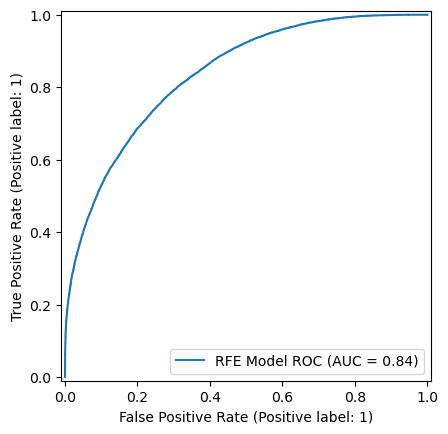

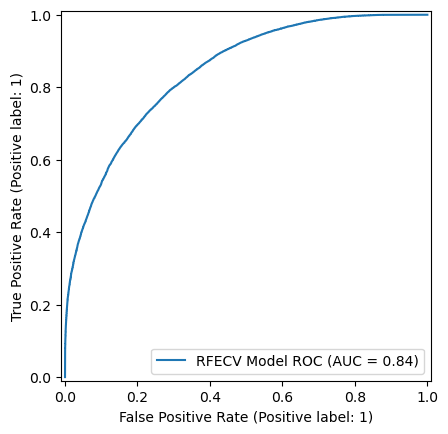

In [351]:
# Define ROC function
rfe_roc_display = RocCurveDisplay.from_predictions(df_results_rfe['Actual'], df_results_rfe['Predicted_Prob'], name='RFE Model ROC')
rfecv_roc_display = RocCurveDisplay.from_predictions(df_results_rfecv['Actual'], df_results_rfecv['Predicted_Prob'], name='RFECV Model ROC')
roc_auc_score_rfe = roc_auc_score(df_results_rfe['Actual'], df_results_rfe['Predicted_Prob'])
roc_auc_score_rfecv = roc_auc_score(df_results_rfecv['Actual'], df_results_rfecv['Predicted_Prob'])
print("RFE Model ROC AUC Score:", roc_auc_score_rfe)
print("RFECV Model ROC AUC Score:", roc_auc_score_rfecv)

In [ ]:
# Call the ROC function


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [352]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance

def predict_with_cutoff(df, cutoff_range):
    metrics = []
    for cutoff in cutoff_range:
        col_name = f"Predicted_{cutoff:.1f}"
        df[col_name] = (df['Predicted_Prob'] >= cutoff).astype(int)

        # Calculate the metrics
        accuracy = accuracy_score(df['Actual'], df[col_name])
        precision = precision_score(df['Actual'], df[col_name], zero_division=0)
        recall = recall_score(df['Actual'], df[col_name])
        f1 = f1_score(df['Actual'], df[col_name])
        sensitivity = recall  # Same as recall
        tn, fp, fn, tp = confusion_matrix(df['Actual'], df[col_name]).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        # Safe AUC
        try:
            auc = roc_auc_score(df['Actual'], df[col_name])
        except ValueError:
            auc = np.nan

        metrics.append({
            'Cutoff': cutoff,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'AUC': auc
            })

    df_metrics = pd.DataFrame(metrics)
    return df, df_metrics

cutoff_range = np.arange(0.1, 0.9, 0.1)
df_cutoff_rfecv, df_metrics_rfecv = predict_with_cutoff(df_results_rfecv, cutoff_range)

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [353]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

display(df_metrics_rfecv)

,Cutoff,Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity,AUC
0,0.1,0.604438,0.545909,0.991369,0.704098,0.991369,0.254757,0.623063
1,0.2,0.680031,0.603145,0.953092,0.738772,0.953092,0.433258,0.693175
2,0.3,0.724912,0.653613,0.894648,0.755368,0.894648,0.571517,0.733082
3,0.4,0.743294,0.694966,0.818497,0.751690,0.818497,0.675330,0.746914
4,0.5,0.751623,0.739573,0.735934,0.737749,0.735934,0.765802,0.750868
5,0.6,0.746338,0.788150,0.636833,0.704457,0.636833,0.845301,0.741067
6,0.7,0.722442,0.835691,0.516960,0.638774,0.516960,0.908143,0.712552
7,0.8,0.682310,0.901184,0.371516,0.526132,0.371516,0.963184,0.667350


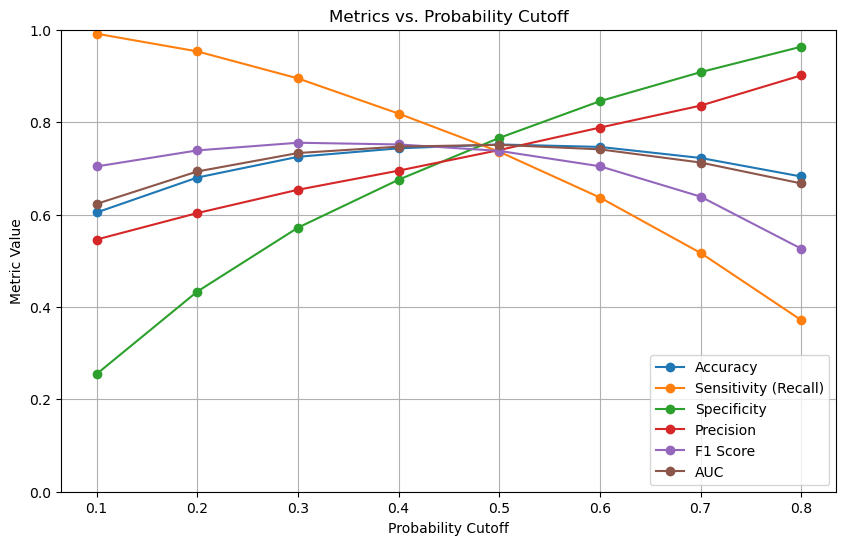

In [355]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

def plot_metrics_vs_cutoff(df_metrics):
    plt.figure(figsize=(10, 6))
    plt.plot(df_metrics['Cutoff'], df_metrics['Accuracy'], marker='o', label='Accuracy')
    plt.plot(df_metrics['Cutoff'], df_metrics['Sensitivity'], marker='o', label='Sensitivity (Recall)')
    plt.plot(df_metrics['Cutoff'], df_metrics['Specificity'], marker='o', label='Specificity')
    plt.plot(df_metrics['Cutoff'], df_metrics['Precision'], marker='o', label='Precision')
    #plt.plot(df_metrics['Cutoff'], df_metrics['Recall'], marker='o', label='Recall')
    plt.plot(df_metrics['Cutoff'], df_metrics['F1 Score'], marker='o', label='F1 Score')
    plt.plot(df_metrics['Cutoff'], df_metrics['AUC'], marker='o', label='AUC')

    plt.title('Metrics vs. Probability Cutoff')
    plt.xlabel('Probability Cutoff')
    plt.ylabel('Metric Value')
    plt.xticks(df_metrics['Cutoff'])
    plt.ylim(0, 1)
    plt.grid()
    plt.legend()
    plt.show()

plot_metrics_vs_cutoff(df_metrics_rfecv)

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [359]:
# Create a column for final prediction based on the optimal cutoff
def optimal_cutoff(df_metrics):
    # You can define your own logic to choose the optimal cutoff
    # Here, we choose the cutoff that maximizes the F1 Score
    optimal_row_f1_max = df_metrics.loc[df_metrics['F1 Score'].idxmax()]

    # You could also consider other criteria, such as maximizing the sum of sensitivity and specificity
    df_metrics['Sum'] = df_metrics['Sensitivity'] + df_metrics['Specificity']
    optimal_row_sens_spec = df_metrics.loc[df_metrics['Sum'].idxmax()]
    return round(optimal_row_f1_max['Cutoff'],4), round(optimal_row_sens_spec['Cutoff'],4)

optimal_cutoff_f1_max, optimal_cutoff_sens_spec = optimal_cutoff(df_metrics_rfecv)
print("Optimal Cutoff Value (F1 Max):", optimal_cutoff_f1_max)
print("Optimal Cutoff Value (Sens + Spec Max):", optimal_cutoff_sens_spec)

Optimal Cutoff Value (F1 Max): 0.3
Optimal Cutoff Value (Sens + Spec Max): 0.5


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [367]:
def final_prediction_based_on_cutoff(df, cutoff):
    df = df[['Actual', 'Predicted_Prob']].copy()
    df['Final_Prediction'] = (df['Predicted_Prob'] >= cutoff).astype(int)
    return df

df_final_predictions = final_prediction_based_on_cutoff(df_cutoff_rfecv, optimal_cutoff_f1_max)

display(df_final_predictions.head())

,Actual,Predicted_Prob,Final_Prediction
0,0,0.116978,0
1,1,0.259335,0
2,1,0.563311,1
3,0,0.146834,0
4,0,0.493863,1


In [368]:
# Calculate the accuracy

def calculate_metrics(df, col_name, cutoff):
    # Calculate the metrics
    metrics = []
    accuracy = accuracy_score(df['Actual'], df[col_name])
    precision = precision_score(df['Actual'], df[col_name], zero_division=0)
    recall = recall_score(df['Actual'], df[col_name])
    f1 = f1_score(df['Actual'], df[col_name])
    sensitivity = recall  # Same as recall
    tn, fp, fn, tp = confusion_matrix(df['Actual'], df[col_name]).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    # Safe AUC
    try:
        auc = roc_auc_score(df['Actual'], df[col_name])
    except ValueError:
        auc = np.nan

    metrics.append({
        'Cutoff': cutoff,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc
        })

    df_metrics = pd.DataFrame(metrics)
    return df_metrics

# optimal_cutoff_f1_max, optimal_cutoff_sens_spec
df_final_metrics = calculate_metrics(df_final_predictions, 'Final_Prediction', optimal_cutoff_sens_spec)

In [369]:
display(df_final_metrics)

,Cutoff,Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity,AUC
0,0.5,0.724912,0.653613,0.894648,0.755368,0.894648,0.571517,0.733082


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [370]:
# Create the confusion matrix once again
confusion_matrix = confusion_matrix(df_final_predictions['Actual'], df_final_predictions['Final_Prediction'])
display(confusion_matrix)

array([[15679, 11755],
       [ 2612, 22181]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [372]:
# Create variables for true positive, true negative, false positive and false negative
tp = confusion_matrix[0,0]
tn = confusion_matrix[1,1]
fp = confusion_matrix[0,1]
fn = confusion_matrix[1,0]

print("TP:", tp, "TN:", tn, "FP:", fp, "FN:", fn)

TP: 15679 TN: 22181 FP: 11755 FN: 2612


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [379]:
# Calculate Sensitivity
print(f"Final Sensitivity for cutoff {optimal_cutoff_sens_spec}: {df_final_metrics['Sensitivity'].values[0]:.2f}")


Final Sensitivity for cutoff 0.5: 0.89


In [380]:
# Calculate Specificity
print(f"Final Specificity for cutoff {optimal_cutoff_sens_spec}: {df_final_metrics['Specificity'].values[0]:.2f}")

Final Specificity for cutoff 0.5: 0.57


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [381]:
# Calculate Precision
print(f"Final Precision for cutoff {optimal_cutoff_sens_spec}: {df_final_metrics['Precision'].values[0]:.2f}")


Final Precision for cutoff 0.5: 0.65


In [382]:
# Calculate Recall
print(f"Final Recall for cutoff {optimal_cutoff_sens_spec}: {df_final_metrics['Recall'].values[0]:.2f}")

Final Recall for cutoff 0.5: 0.89


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [391]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve, average_precision_score

In [389]:
# Check actual and predicted values from initial model
df_final_predictions.groupby(['Actual', 'Final_Prediction']).sum()

Predicted_Prob
Actual Final_Prediction                
0      0                    2006.128702
       1                    6408.262338
1      0                     528.920228
       1                   15849.759859

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

A PR curve shows how precision vs recall trade off as you vary the classification threshold.

- It’s particularly useful on imbalanced datasets (like attrition, fraud detection, medical diagnoses), where accuracy alone can be misleading.
- Instead of sticking to the default cutoff (0.5), the PR curve lets you explore how the model performs across all thresholds.
- The final model (after feature selection / hyperparameter tuning) is the one you’d typically report PR curves for, because that’s the model you’ll deploy.
- But plotting it on the initial model as well gives you a before vs after comparison, so you can see whether your model refinement actually improved the balance between precision and recall.

👉 That’s the point of plotting the PR curve on both models:
- Initial model’s PR curve → baseline performance.
- Final model’s PR curve → improved (or not) performance.

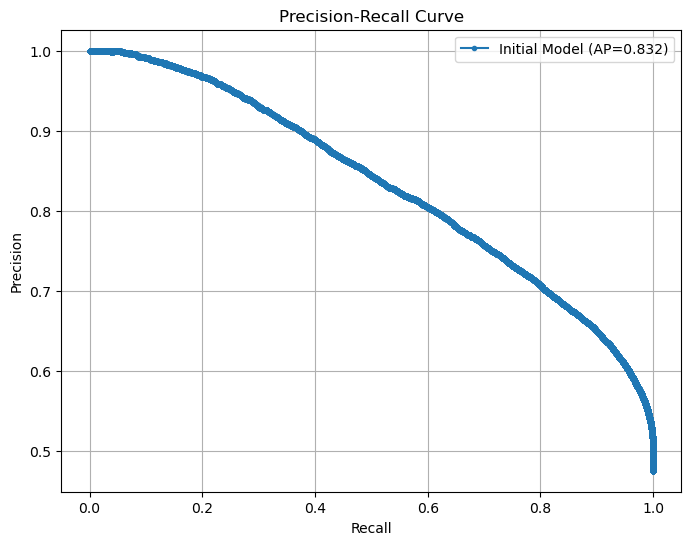

In [395]:
# Plot precision-recall curve

def plot_precision_recall_curve(df_init):
 
    # Initial model
    y_true = df_init['Actual']
    y_scores = df_init['Predicted_Prob']
    precision_init, recall_init, thresh_init = precision_recall_curve(y_true, y_scores)
    ap_init = average_precision_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_init, precision_init, marker='.', label=f'Initial Model (AP={ap_init:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()
plot_precision_recall_curve(df_final_predictions)

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

# View predictions


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'

# Convert 'y_validation' to DataFrame 'actual'

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

# Check the DataFrame


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix


In [ ]:
# Create variables for true positive, true negative, false positive and false negative


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity


In [ ]:
# Calculate specificity


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision


In [ ]:
# Calculate recall


## Conclusion

